<a href="https://colab.research.google.com/github/pedrocz82/Data-Science-learning-projects/blob/main/Regression_model_House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**House Prices prediction**

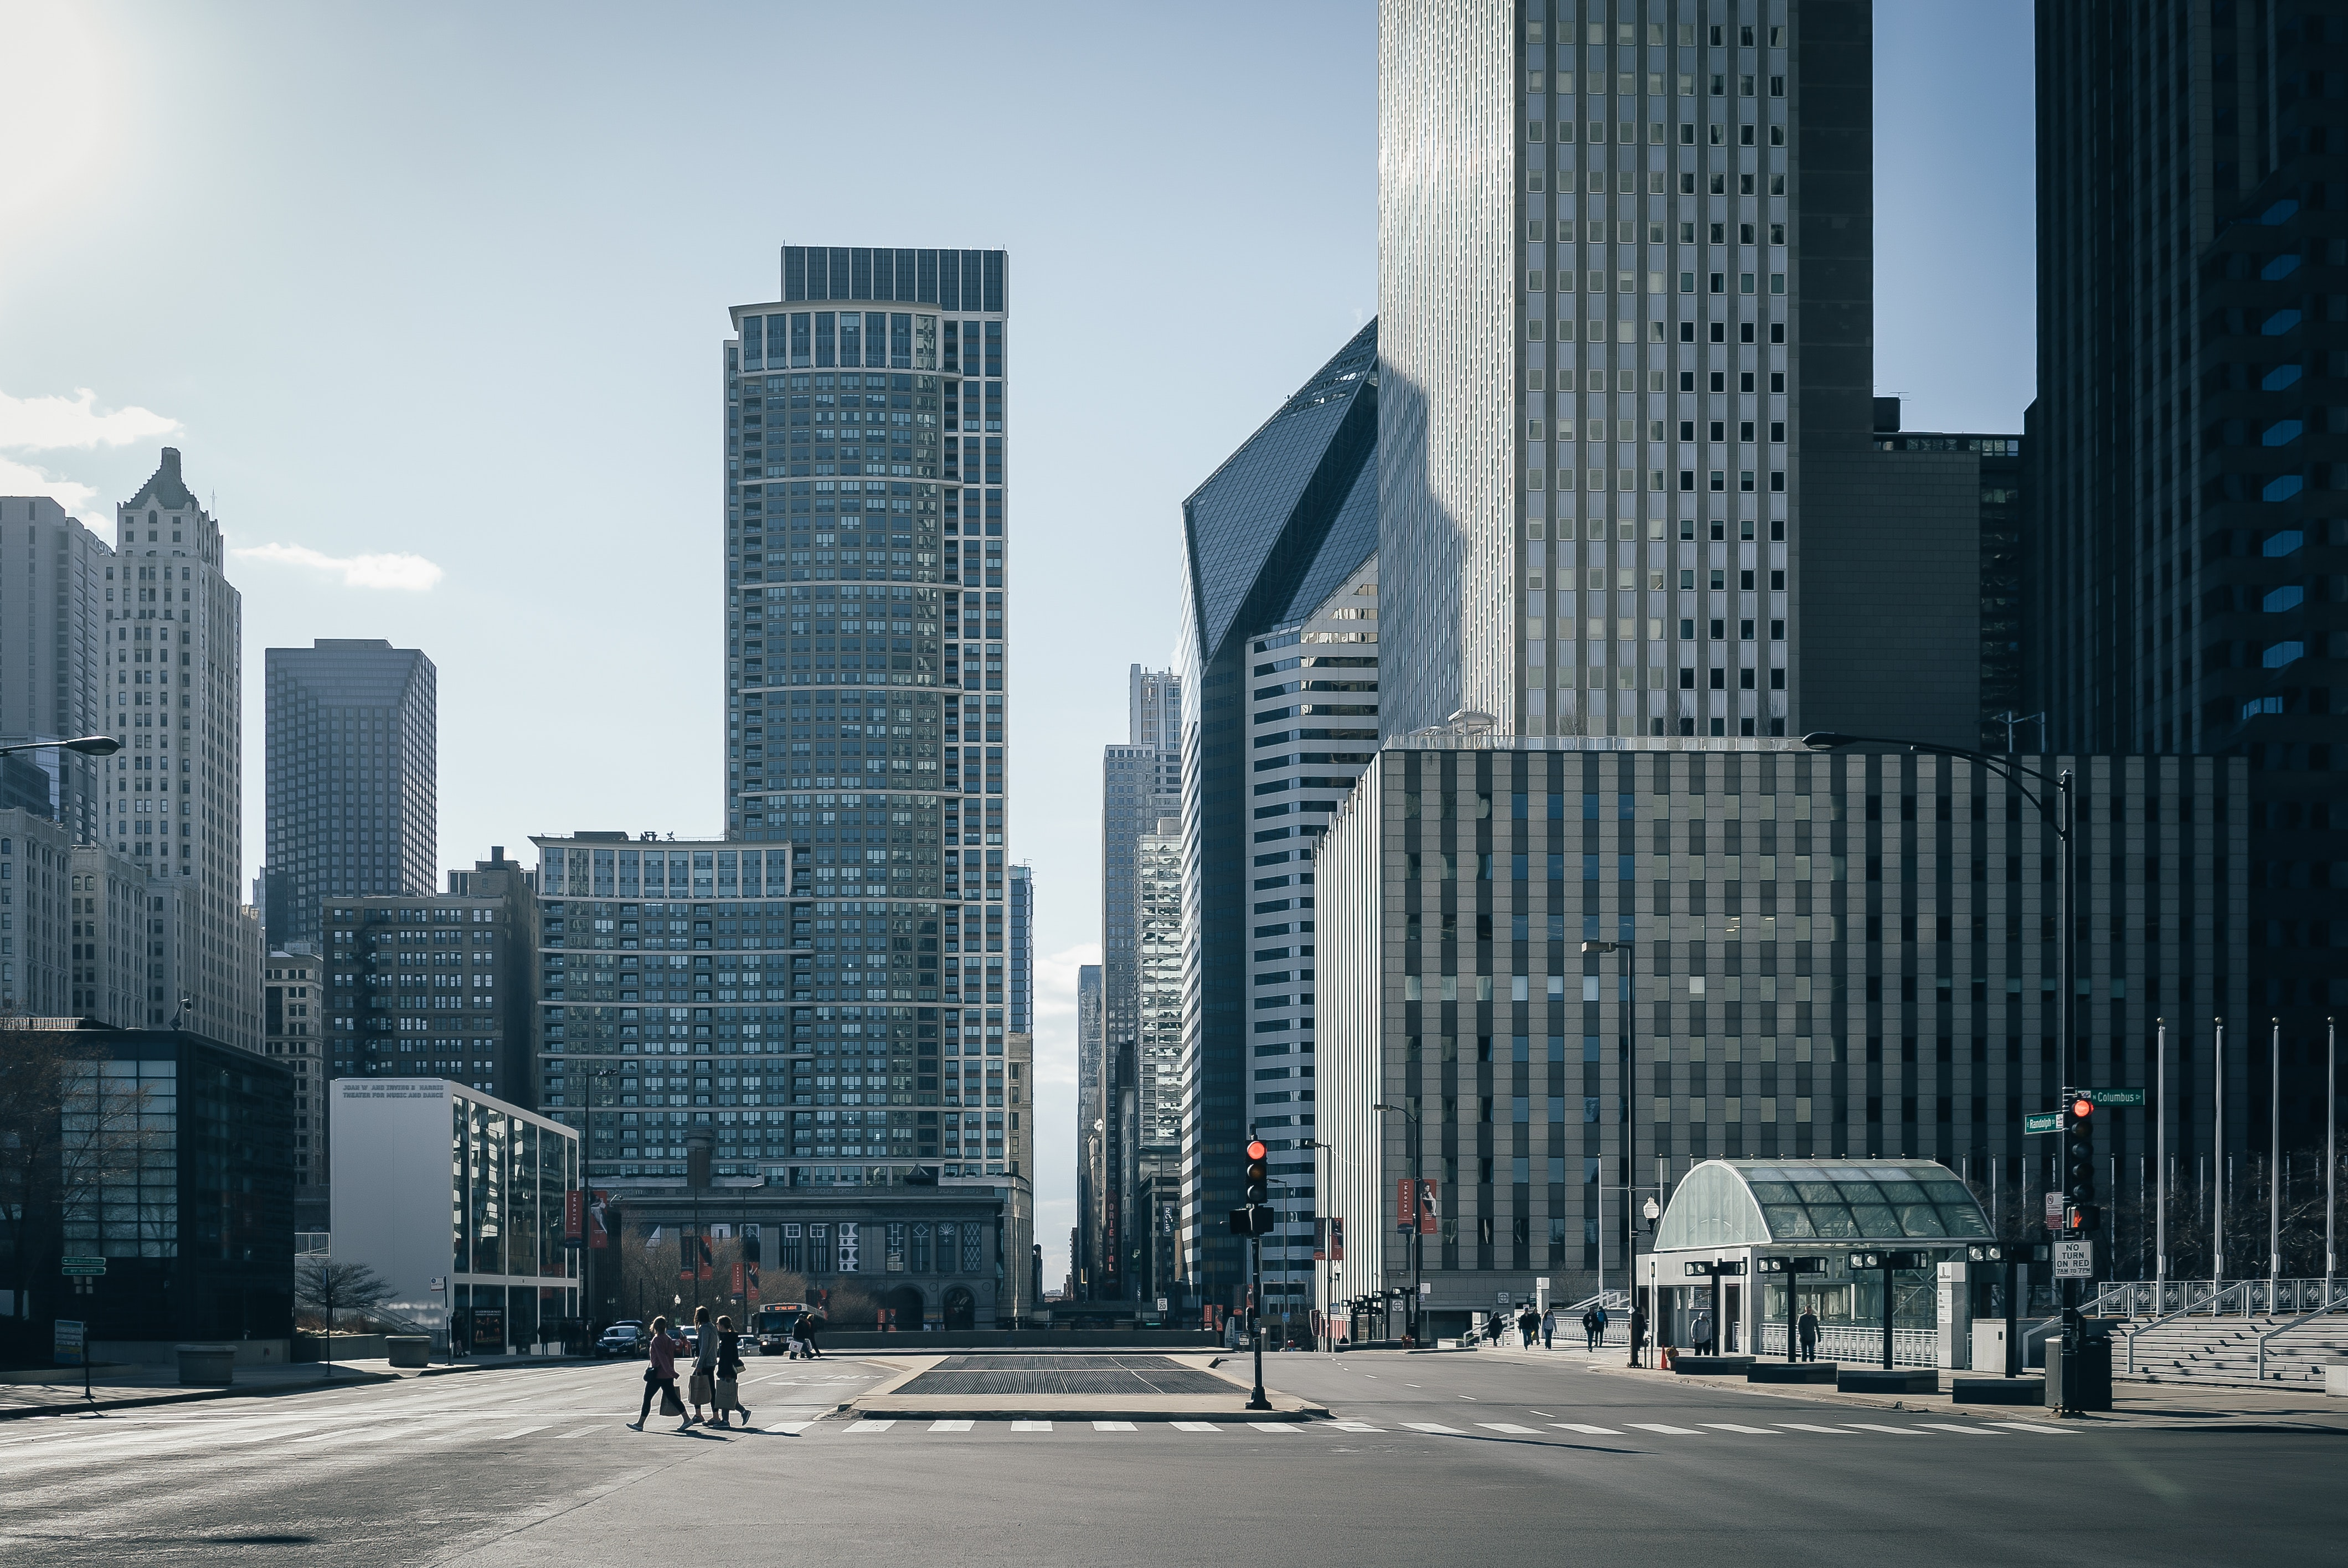

#**1. Introduction**

This dataset has house data that can be used to correlate with prices. Each variable could have influence on the final price and the feature importances will be evaluated [1]. <br> The Price variable is the target and is a continuous variable, being a regression problem. In this work it waws used Random Forest algorithm run a model of house price prediction.

**Dataset description**



*   SalePrice - the property's sale price in dollars. Target variable.
*   MSSubClass: The building class
*   MSZoning: The general zoning classification
*   LotFrontage: Linear feet of street connected to property
*   LotArea: Lot size in square feet
*   Street: Type of road access
*   Alley: Type of alley access
*   LotShape: General shape of property
*   LandContour: Flatness of the property
*   Utilities: Type of utilities available
*   LotConfig: Lot configuration
*   LandSlope: Slope of property
*   Neighborhood: Physical locations within Ames city limits
*   Condition1: Proximity to main road or railroad
*   Condition2: Proximity to main road or railroad (if a second is present)
*   BldgType: Type of dwelling
*   HouseStyle: Style of dwelling
*   OverallQual: Overall material and finish quality
*   OverallCond: Overall condition rating
*   YearBuilt: Original construction date
*   YearRemodAdd: Remodel date
*   RoofStyle: Type of roof
*   RoofMatl: Roof material
*   Exterior1st: Exterior covering on house
*   Exterior2nd: Exterior covering on house (if more than one material)
*   MasVnrType: Masonry veneer type
*   MasVnrArea: Masonry veneer area in square feet
*   ExterQual: Exterior material quality
*   ExterCond: Present condition of the material on the exterior
*   Foundation: Type of foundation
*   BsmtQual: Height of the basement
*   BsmtCond: General condition of the basement
*   BsmtExposure: Walkout or garden level basement walls
*   BsmtFinType1: Quality of basement finished area
*   BsmtFinSF1: Type 1 finished square feet
*   BsmtFinType2: Quality of second finished area (if present)
*   BsmtFinSF2: Type 2 finished square feet
*   BsmtUnfSF: Unfinished square feet of basement area
*   TotalBsmtSF: Total square feet of basement area
*   Heating: Type of heating
*   HeatingQC: Heating quality and condition
*   CentralAir: Central air conditioning
*   Electrical: Electrical system
*   1stFlrSF: First Floor square feet
*   2ndFlrSF: Second floor square feet
*   LowQualFinSF: Low quality finished square feet (all floors)
*   GrLivArea: Above grade (ground) living area square feet
*   BsmtFullBath: Basement full bathrooms
*   BsmtHalfBath: Basement half bathrooms
*   FullBath: Full bathrooms above grade
*   HalfBath: Half baths above grade
*   Bedroom: Number of bedrooms above basement level
*   Kitchen: Number of kitchens
*   KitchenQual: Kitchen quality
*   TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
*   Functional: Home functionality rating
*   Fireplaces: Number of fireplaces
*   FireplaceQu: Fireplace quality
*   GarageType: Garage location
*   GarageYrBlt: Year garage was built
*   GarageFinish: Interior finish of the garage
*   GarageCars: Size of garage in car capacity
*   GarageArea: Size of garage in square feet
*   GarageQual: Garage quality
*   GarageCond: Garage condition
*   PavedDrive: Paved driveway
*   WoodDeckSF: Wood deck area in square feet
*   OpenPorchSF: Open porch area in square feet
*   EnclosedPorch: Enclosed porch area in square feet
*   3SsnPorch: Three season porch area in square feet
*   ScreenPorch: Screen porch area in square feet
*   PoolArea: Pool area in square feet
*   PoolQC: Pool quality
*   Fence: Fence quality
*   MiscFeature: Miscellaneous feature not covered in other categories
*   MiscVal: $Value of miscellaneous feature
*   MoSold: Month Sold
*   YrSold: Year Sold
*   SaleType: Type of sale
*   SaleCondition: Condition of sale

#**2. Data overview and feature engineering**

In [36]:
#Importing main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
test = pd.read_csv('/content/sample_data/test.csv')
df_train = pd.read_csv('/content/sample_data/train.csv')
df_submission = pd.read_csv('/content/sample_data/sample_submission.csv')

In [38]:
print(test.shape)
print(df_submission.shape)
print(df_train.shape)

(1459, 80)
(1459, 2)
(1460, 81)


In [39]:
df_test = pd.merge(test, df_submission, on='Id')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
#checking for missing values, missing values/total and type in df_train dataset
for column in df_train.columns:
    if df_train[column].isnull().sum() != 0:
        print("_________________________________________________________________________________________________________")
        print(f"{column} -> Missing Values: {df_train[column].isnull().sum()} |Missing Values/total__ : {df_train[column].isnull().sum()/df_train.shape[0]} | dtypes: {df_train[column].dtypes}")

_________________________________________________________________________________________________________
LotFrontage -> Missing Values: 259 |Missing Values/total__ : 0.1773972602739726 | dtypes: float64
_________________________________________________________________________________________________________
Alley -> Missing Values: 1369 |Missing Values/total__ : 0.9376712328767123 | dtypes: object
_________________________________________________________________________________________________________
MasVnrType -> Missing Values: 8 |Missing Values/total__ : 0.005479452054794521 | dtypes: object
_________________________________________________________________________________________________________
MasVnrArea -> Missing Values: 8 |Missing Values/total__ : 0.005479452054794521 | dtypes: float64
_________________________________________________________________________________________________________
BsmtQual -> Missing Values: 37 |Missing Values/total__ : 0.025342465753424658 | dtypes:

In [42]:
#dropping samples greater than or equal to 45% of missing values and id column, not relevant for study. The same will be done with df_test
df_train.drop(df_train.columns[[0, 6, 57, 72, 73, 74]], axis = 1, inplace=True)
df_test.drop(df_test.columns[[0, 6, 57, 72, 73, 74]], axis = 1, inplace=True)

In [43]:
print(len(df_train.columns))
print(len(df_test.columns))

75
75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fccde2c32d0>,
      dtype=object)

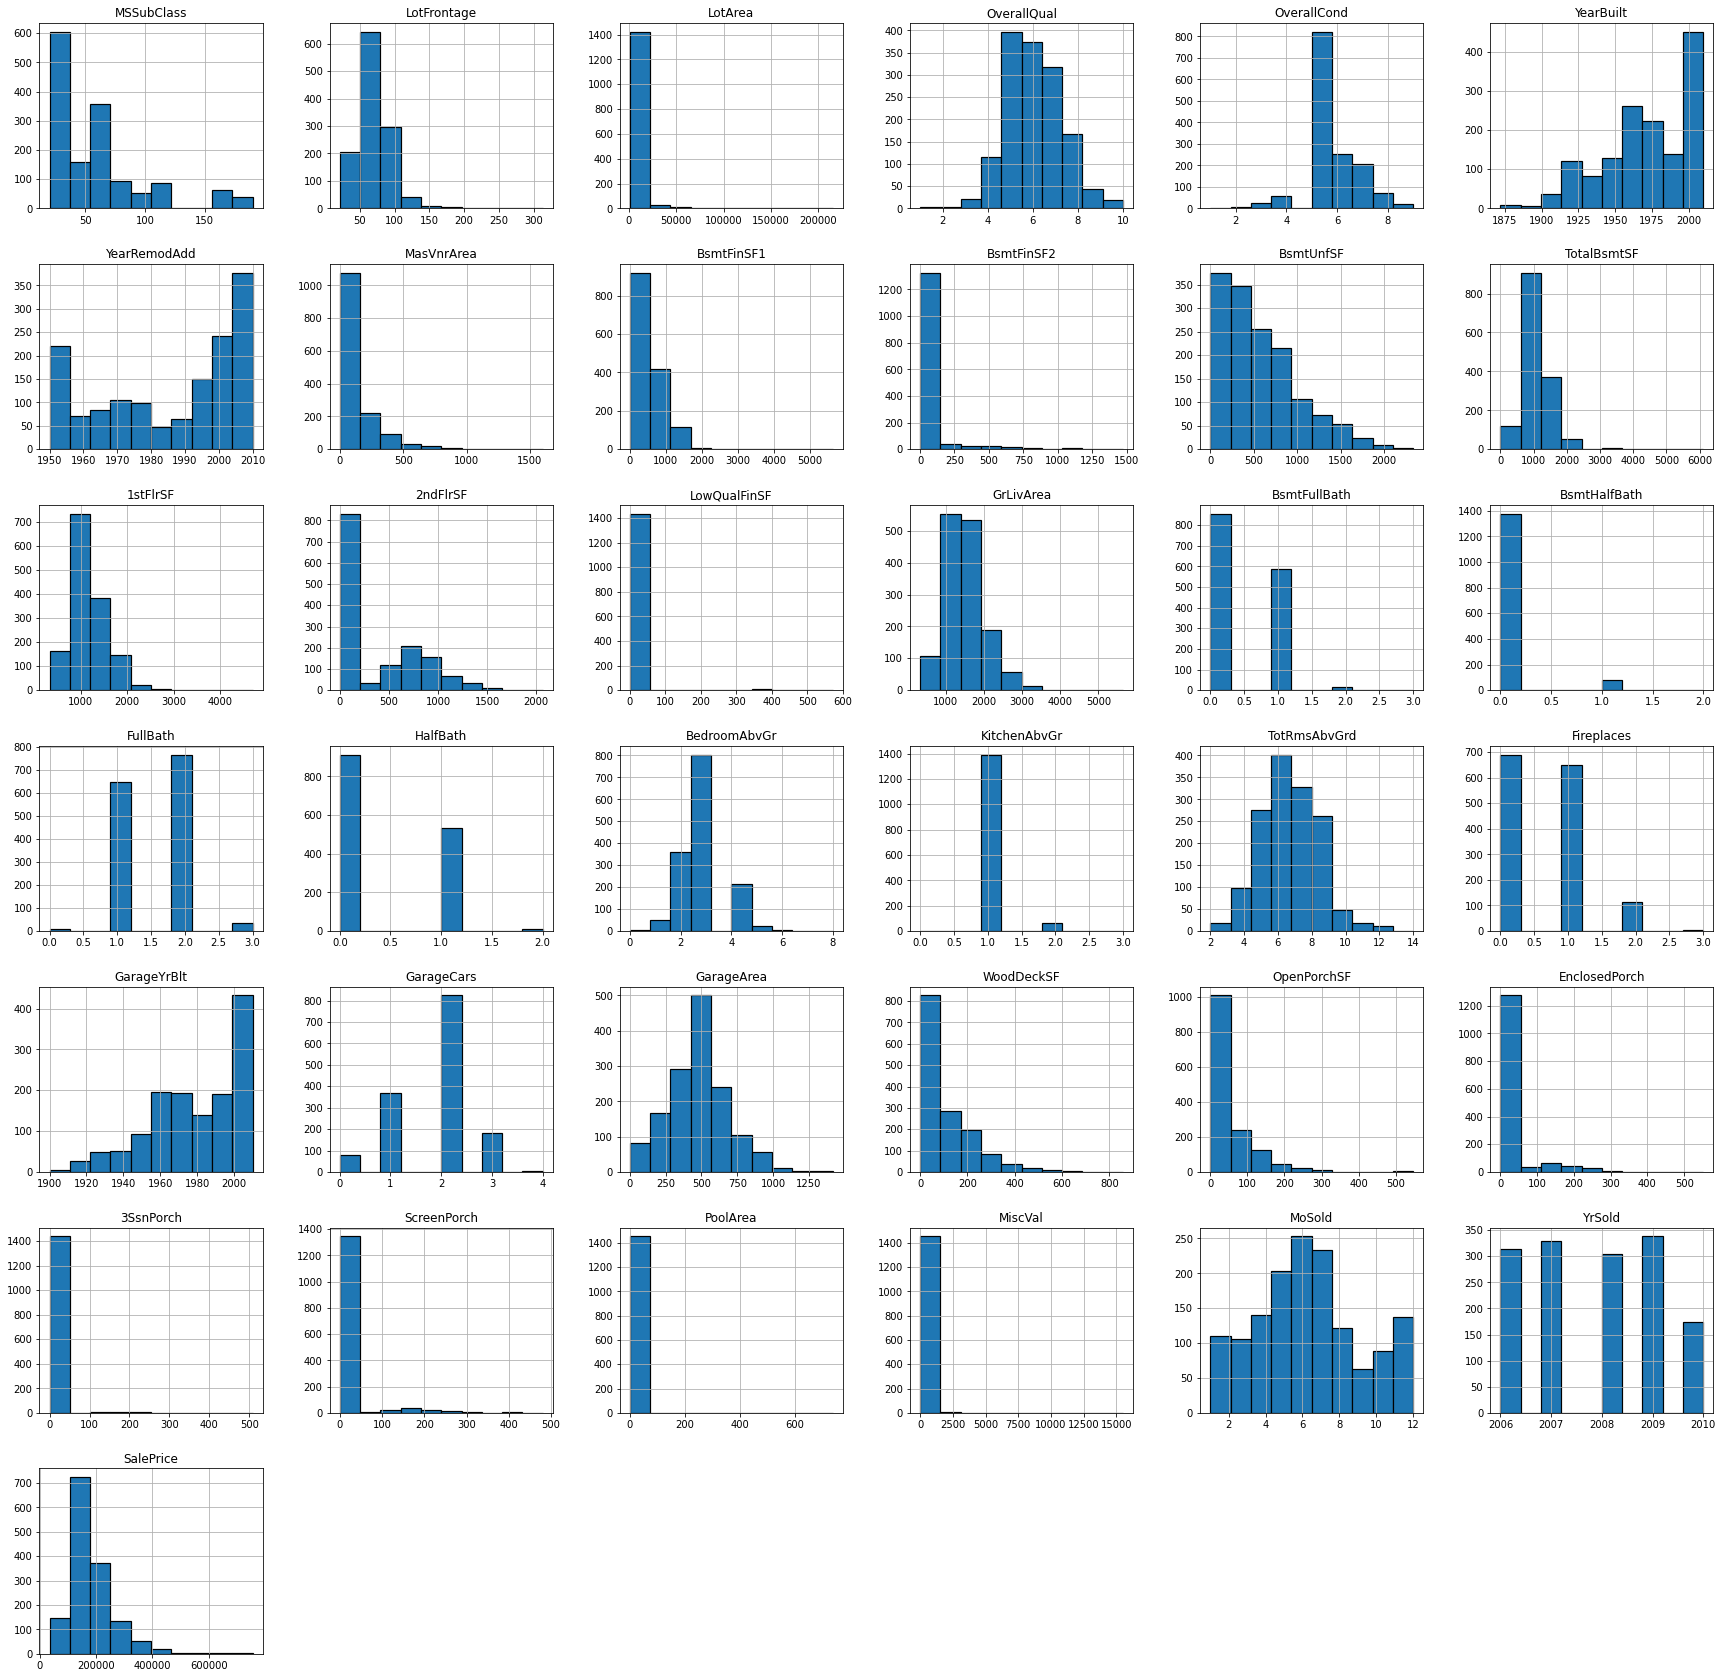

In [44]:
df_train.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30))

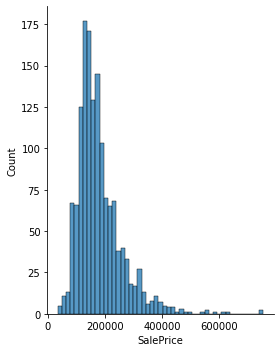

In [45]:
sns.displot(data=df_train, x="SalePrice", kind="hist", aspect=0.8)

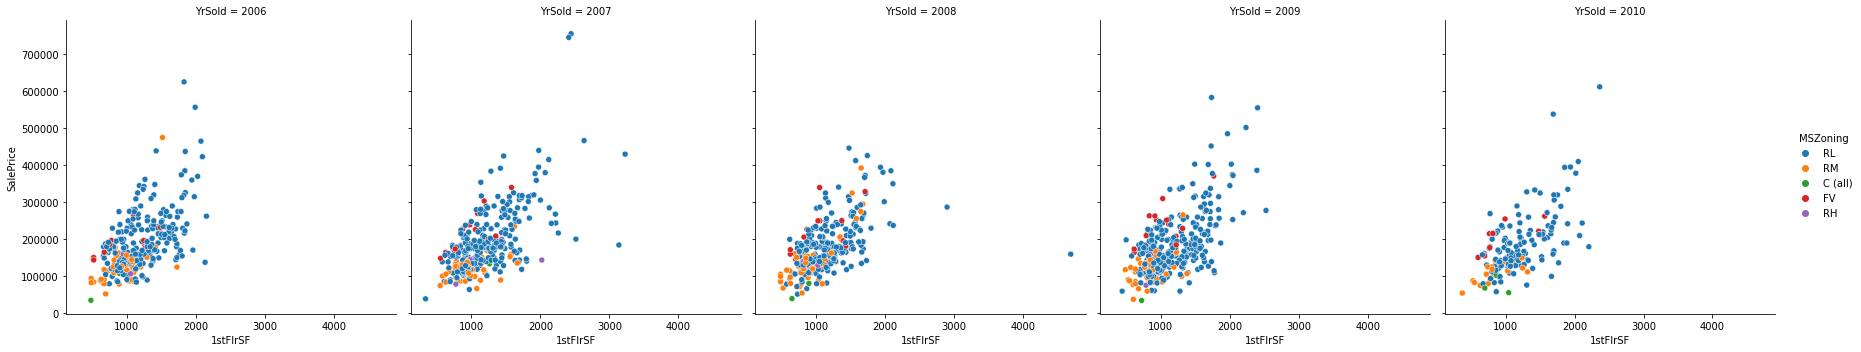

In [46]:
sns.relplot(x='1stFlrSF', y="SalePrice", hue="MSZoning",
            col="YrSold", data=df_train)

The house selling follows a periodic frequency, being the highest sales, in the middle of the year and the lowest sales in the beggining and end of the years. 

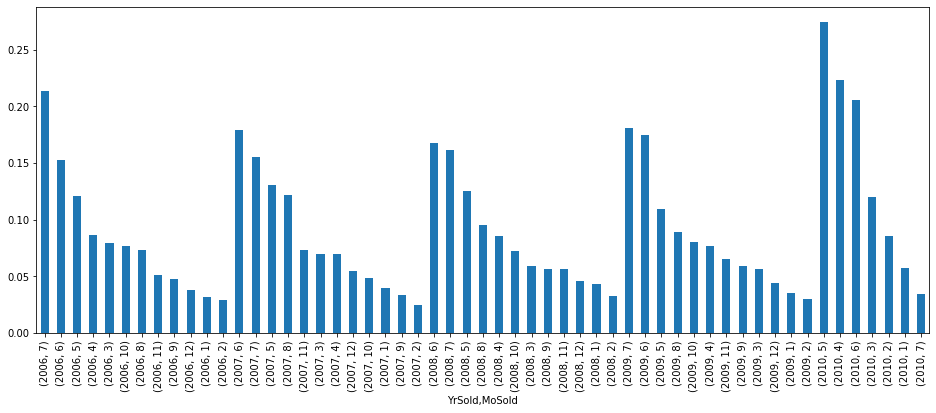

In [47]:
df_train.groupby(df_train['YrSold']).MoSold.value_counts(normalize=True).plot(kind='bar', figsize=(16,6))

**Transforming categorical data**

In [48]:
objList_train = df_train.select_dtypes(include = "object").columns
print(objList_train)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [49]:
#get dummies for object to numeric conversion

for feat in objList_train:
    df_train[feat] = pd.get_dummies(df_train, drop_first=True)

df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,60.0,65.0,8450,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,7,5,2003,2003,60.0,60.0,60.0,60.0,60.0,196.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,706,60.0,0,150,856,60.0,60.0,60.0,60.0,856,854,0,1710,1,0,2,1,3,1,60.0,8,60.0,0,60.0,2003.0,60.0,2,548,60.0,60.0,60.0,0,61,0,0,0,0,0,2,2008,60.0,60.0,208500
1,20,20.0,80.0,9600,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,6,8,1976,1976,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,978,20.0,0,284,1262,20.0,20.0,20.0,20.0,1262,0,0,1262,0,1,2,0,3,1,20.0,6,20.0,1,20.0,1976.0,20.0,2,460,20.0,20.0,20.0,298,0,0,0,0,0,0,5,2007,20.0,20.0,181500
2,60,60.0,68.0,11250,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,7,5,2001,2002,60.0,60.0,60.0,60.0,60.0,162.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,486,60.0,0,434,920,60.0,60.0,60.0,60.0,920,866,0,1786,1,0,2,1,3,1,60.0,6,60.0,1,60.0,2001.0,60.0,2,608,60.0,60.0,60.0,0,42,0,0,0,0,0,9,2008,60.0,60.0,223500


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [51]:
objList_test = df_test.select_dtypes(include = "object").columns
print(objList_test)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [52]:
for feat in objList_test:
    df_test[feat] = pd.get_dummies(df_test, drop_first=True)

df_test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,20.0,80.0,11622,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,5,6,1961,1961,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,468.0,20.0,144.0,270.0,882.0,20.0,20.0,20.0,20.0,896,0,0,896,0.0,0.0,1,0,2,1,20.0,5,20.0,0,20.0,1961.0,20.0,1.0,730.0,20.0,20.0,20.0,140,0,0,0,120,0,0,6,2010,20.0,20.0,169277.052498
1,20,20.0,81.0,14267,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,6,6,1958,1958,20.0,20.0,20.0,20.0,20.0,108.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,923.0,20.0,0.0,406.0,1329.0,20.0,20.0,20.0,20.0,1329,0,0,1329,0.0,0.0,1,1,3,1,20.0,6,20.0,0,20.0,1958.0,20.0,1.0,312.0,20.0,20.0,20.0,393,36,0,0,0,0,12500,6,2010,20.0,20.0,187758.393989
2,60,60.0,74.0,13830,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,5,5,1997,1998,60.0,60.0,60.0,60.0,60.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,791.0,60.0,0.0,137.0,928.0,60.0,60.0,60.0,60.0,928,701,0,1629,0.0,0.0,2,1,3,1,60.0,6,60.0,1,60.0,1997.0,60.0,2.0,482.0,60.0,60.0,60.0,212,34,0,0,0,0,0,3,2010,60.0,60.0,183583.683570


**Using StandardScaler for data standardization**

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train_sc = sc.fit_transform(df_train)


sc = StandardScaler()
df_test_sc = sc.fit_transform(df_test)

In [54]:
print(df_train_sc.shape)
print(df_test_sc.shape)

(1460, 75)
(1459, 75)


In [55]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_knn = pd.DataFrame(imputer.fit_transform(df_train_sc), columns = df_train.columns)

df_test_knn = pd.DataFrame(imputer.fit_transform(df_test_sc), columns = df_test.columns)

In [56]:
X_train = df_train_knn.iloc[:, 0:-1]
y_train = df_train_knn.iloc[:,-1]
X_test = df_train_knn.iloc[:, 0:-1]
y_test = df_train_knn.iloc[:,-1]

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1460, 74)
(1460,)
(1460, 74)
(1460,)


##**3. Random Forest Model**

In [58]:
# Importing model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [59]:
# Use the forest's predict method on the test data
pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')

Mean Absolute Error: 0.097 degrees.


In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)**(0.5)
mse

0.159573201529919

In [68]:
from sklearn import metrics

In [72]:
print("Random Forest Regression Model Score is ",round(rf.score(X_test,y_test)*100))


models_score =pd.DataFrame({'Model':['Random forest Regression'],
                            'Score':[rf.score],
                            })

Random Forest Regression Model Score is  97


**Feature importance using SHAP [2]**

In [30]:
!pip install shap

     |████████████████████████████████| 356 kB 4.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491646 sha256=a18b0f337f43831d41be7a0ce1df39a9db37ed7bc268f3c69add24775db6a53f
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


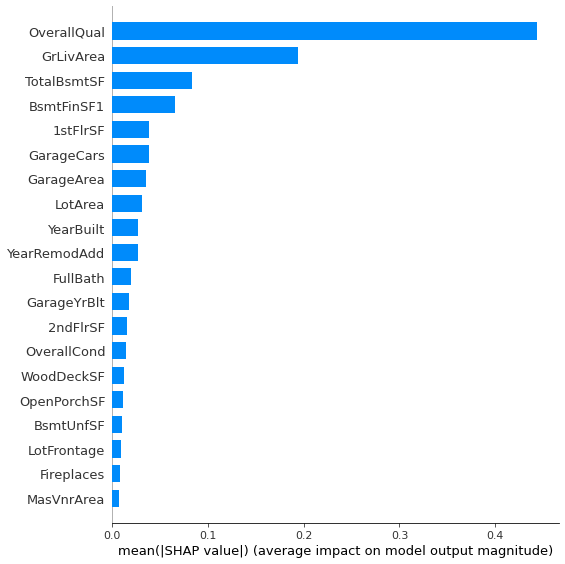

In [67]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

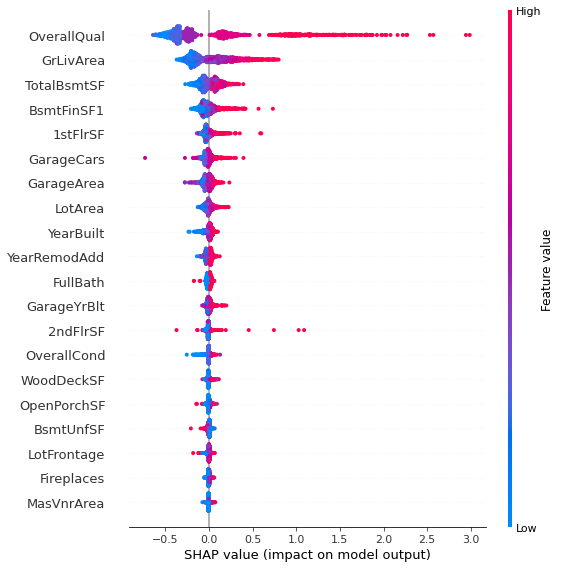

In [35]:
shap.summary_plot(shap_values, X_train)

##**4. Conclusion**

The purpose of this work was build a Random Forest regression method to predict house prices, based on dataset informations about house parameters. The algorithm showed accuracy of 97% with low values of MAE, indicating a suitable model. More optimizations are necessary. It was applied a feature importance method to evaluate wich variables influences this model. With these data, it can be performed further optimizations eliminating non important features.

##**5. References**

* [1] https://www.kaggle.com/subhradeep88/house-price-predict-decision-tree-random-forest

* [2] https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

  <br> I am thankfull for Ricardo Esquivel from Pexels